In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df_train= pd.read_csv(r'C:\Users\DELL\Desktop\Bigmart\Dataset\train.csv')
df_test= pd.read_csv(r'C:\Users\DELL\Desktop\Bigmart\Dataset\test.csv')

In [97]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [98]:
df_train.shape

(8523, 12)

In [99]:
df_train = df_train.drop_duplicates(keep=False)
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [100]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [102]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [104]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [105]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [106]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [107]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)


In [108]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [109]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

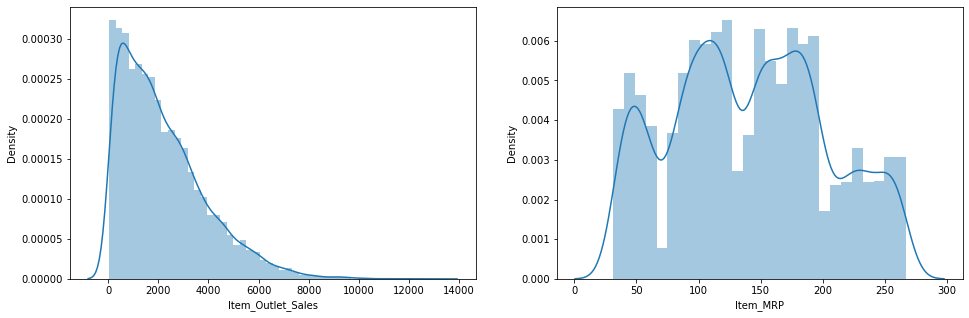

In [110]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_train['Item_Outlet_Sales'])
plt.subplot(1,2,2)
sns.distplot(df_train['Item_MRP'])
plt.show()

In [111]:
print("Highest allowed",df_train['Item_Outlet_Sales'].mean() + 3*df_train['Item_Outlet_Sales'].std())
print("Lowest allowed",df_train['Item_Outlet_Sales'].mean() - 3*df_train['Item_Outlet_Sales'].std())

Highest allowed 7300.787760776532
Lowest allowed -2938.209933626459


In [112]:
df_train[(df_train['Item_Outlet_Sales'] > 7300.78) | (df_train['Item_Outlet_Sales'] < -2938)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
130,12.857645,Low Fat,0.033810,Canned,180.5976,1985,Medium,Tier 3,Supermarket Type3,7968.2944
145,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,1999,Medium,Tier 1,Supermarket Type1,7370.4060
276,16.750000,Low Fat,0.081253,Fruits and Vegetables,256.4988,1987,High,Tier 3,Supermarket Type1,7452.9652
304,9.395000,Low Fat,0.159658,Soft Drinks,224.9720,2002,Medium,Tier 2,Supermarket Type1,7696.6480
333,12.857645,Regular,0.056597,Snack Foods,230.9984,1985,Medium,Tier 3,Supermarket Type3,9267.9360
...,...,...,...,...,...,...,...,...,...,...
7930,12.857645,Low Fat,0.083536,Meat,255.4330,1985,Medium,Tier 3,Supermarket Type3,9227.9880
8039,16.750000,Low Fat,0.081485,Fruits and Vegetables,258.0988,2002,Medium,Tier 2,Supermarket Type1,8994.9580
8201,12.857645,Regular,0.036704,Meat,228.1352,1985,Medium,Tier 3,Supermarket Type3,9390.4432
8245,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,1999,Medium,Tier 1,Supermarket Type1,7549.5062


In [113]:
df_train = df_train[(df_train['Item_Outlet_Sales'] < 7300) & (df_train['Item_Outlet_Sales'] > -2938)]
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [114]:
upper_limit = df_train['Item_Outlet_Sales'].mean() + 3*df_train['Item_Outlet_Sales'].std()
lower_limit = df_train['Item_Outlet_Sales'].mean() - 3*df_train['Item_Outlet_Sales'].std()

In [115]:
df_train['Item_Outlet_Sales'] = np.where(
    df_train['Item_Outlet_Sales']>upper_limit,
    upper_limit,
    np.where(
        df_train['Item_Outlet_Sales']<lower_limit,
        lower_limit,
        df_train['Item_Outlet_Sales']
    )
)

In [116]:
df_train['Item_Outlet_Sales'].describe()

count    8433.000000
mean     2113.044935
std      1578.907844
min        33.290000
25%       822.263000
50%      1768.364800
75%      3056.022000
max      6862.647342
Name: Item_Outlet_Sales, dtype: float64

In [117]:
print("Highest allowed",df_train['Item_Outlet_Sales'].mean() + 3*df_train['Item_Outlet_Sales'].std())
print("Lowest allowed",df_train['Item_Outlet_Sales'].mean() - 3*df_train['Item_Outlet_Sales'].std())

Highest allowed 6849.768467217222
Lowest allowed -2623.6785968946388


In [118]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [119]:
import klib

In [120]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8433, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.74 MB (-77.08%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8428,6.865,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8429,8.38,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8430,10.6,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8431,7.21,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [121]:
klib.clean_column_names(df_train) 

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [122]:
df_train=klib.convert_datatypes(df_train)

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8433 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8433 non-null   Float32 
 1   item_fat_content           8433 non-null   category
 2   item_visibility            8433 non-null   Float32 
 3   item_type                  8433 non-null   category
 4   item_mrp                   8433 non-null   Float32 
 5   outlet_establishment_year  8433 non-null   int16   
 6   outlet_size                8433 non-null   category
 7   outlet_location_type       8433 non-null   category
 8   outlet_type                8433 non-null   category
 9   item_outlet_sales          8433 non-null   Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 547.5 KB


In [124]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.38,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.6,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.21,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8433 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8433 non-null   Float32 
 1   item_fat_content           8433 non-null   category
 2   item_visibility            8433 non-null   Float32 
 3   item_type                  8433 non-null   category
 4   item_mrp                   8433 non-null   Float32 
 5   outlet_establishment_year  8433 non-null   int16   
 6   outlet_size                8433 non-null   category
 7   outlet_location_type       8433 non-null   category
 8   outlet_type                8433 non-null   category
 9   item_outlet_sales          8433 non-null   Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 547.5 KB


<AxesSubplot:xlabel='item_outlet_sales'>

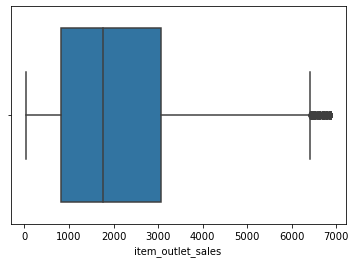

In [126]:
sns.boxplot(df_train['item_outlet_sales'])

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
#ohe = OneHotEncoder()
#df_train = pd.get_dummies(df_train, columns = ['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type','item_type'])

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [130]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [131]:
X=df_train.drop('item_outlet_sales',axis=1)

In [132]:
Y=df_train['item_outlet_sales']

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [134]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [135]:
X_train_std= sc.fit_transform(X_train)

In [136]:
X_test_std= sc.transform(X_test)

In [137]:
X_train_std

array([[-0.65271177, -0.7428828 , -0.21797376, ..., -0.28656363,
        -0.12925044, -0.24468511],
       [ 1.73693366,  1.34610735, -0.98903008, ..., -0.28656363,
        -1.35904381, -0.24468511],
       [-0.55853864,  1.34610735, -0.3449481 , ..., -1.95164397,
         1.10054292, -0.24468511],
       ...,
       [-1.19773943, -0.7428828 ,  1.43092029, ..., -0.28656363,
         1.10054292,  1.03092986],
       [-0.00347107, -0.7428828 , -0.26926797, ..., -0.28656363,
         1.10054292,  2.30654482],
       [ 0.66571321,  1.34610735, -1.10649002, ...,  1.37851671,
        -0.12925044, -0.24468511]])

In [138]:
X_test_std

array([[-0.84458984,  1.34610735, -0.86955753, ...,  1.37851671,
        -0.12925044, -0.24468511],
       [ 1.08949275, -0.7428828 , -1.01139603, ..., -0.28656363,
        -1.35904381, -0.24468511],
       [ 1.11303615, -0.7428828 , -0.90932146, ..., -0.28656363,
        -0.12925044, -0.24468511],
       ...,
       [ 1.25429607, -0.7428828 ,  1.85629776, ..., -0.28656363,
         1.10054292,  1.03092986],
       [ 0.33610702,  1.34610735, -0.3158006 , ...,  1.37851671,
        -1.35904381, -0.24468511],
       [-1.40845201,  1.34610735,  1.35740842, ..., -1.95164397,
         1.10054292, -0.24468511]])

In [139]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [140]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [141]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
6904,9.285,1,0.021003,13,161.157806,2004,2,1,1
3893,17.5,0,0.013658,5,256.330414,1999,1,0,1
5390,17.6,0,0.018944,8,237.358994,2002,1,1,1
3601,13.5,1,0.128816,15,96.406799,1997,2,0,1
2391,17.85,0,0.044463,13,127.101997,1997,2,0,1


In [142]:
Y_pred_lr=lr.predict(X_test_std)

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [144]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.5061171311366153
879.2254928362512
1133.5740327771007


In [145]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [146]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [147]:
Y_pred_rf= rf.predict(X_test_std)

In [148]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
6904,9.285,1,0.021003,13,161.157806,2004,2,1,1
3893,17.5,0,0.013658,5,256.330414,1999,1,0,1
5390,17.6,0,0.018944,8,237.358994,2002,1,1,1
3601,13.5,1,0.128816,15,96.406799,1997,2,0,1
2391,17.85,0,0.044463,13,127.101997,1997,2,0,1


In [149]:
lr.predict(X_test_std)

array([2115.23110006, 4239.38188343, 3525.14554379, ...,  910.69034628,
       3214.52780276, 2634.19888323])

In [150]:
Y_test

6904    4011.445068
3893    6199.929688
5390    6145.333984
3601    2527.376709
2391    2024.031982
           ...     
7637    1366.221558
3686    1058.621948
1616     549.284973
7001    3799.054688
5715    2703.147949
Name: item_outlet_sales, Length: 1687, dtype: Float32

In [151]:
Y_pred_lr=lr.predict(X_test_std)

In [152]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5644071400458852
768.373320489292
1064.5799533154534


In [153]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators, max_depth = max_depth)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 90 candidates, totalling 180 fits
Best: 0.591 using {'max_depth': 5, 'n_estimators': 1000}
0.252 (0.006) with: {'max_depth': 1, 'n_estimators': 10}
0.249 (0.006) with: {'max_depth': 1, 'n_estimators': 100}
0.249 (0.006) with: {'max_depth': 1, 'n_estimators': 1000}
0.457 (0.006) with: {'max_depth': 2, 'n_estimators': 10}
0.467 (0.011) with: {'max_depth': 2, 'n_estimators': 100}
0.466 (0.009) with: {'max_depth': 2, 'n_estimators': 1000}
0.536 (0.005) with: {'max_depth': 3, 'n_estimators': 10}
0.538 (0.001) with: {'max_depth': 3, 'n_estimators': 100}
0.537 (0.001) with: {'max_depth': 3, 'n_estimators': 1000}
0.581 (0.005) with: {'max_depth': 4, 'n_estimators': 10}
0.582 (0.005) with: {'max_depth': 4, 'n_estimators': 100}
0.583 (0.005) with: {'max_depth': 4, 'n_estimators': 1000}
0.589 (0.007) with: {'max_depth': 5, 'n_estimators': 10}
0.591 (0.005) with: {'max_depth': 5, 'n_estimators': 100}
0.591 (0.005) with: {'max_depth': 5, 'n_estimators': 1000}
0.586 (0.00

In [154]:
grid_search_forest.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [155]:
grid_search_forest.best_score_

0.5913706162134924

In [156]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [157]:
r2_score(Y_test,Y_pred_rf_grid)

0.6035804816705097

In [158]:
import joblib

In [159]:
joblib.dump(lr,r'C:\Users\DELL\Desktop\Practice bigmart\Models\lr.sav')

['C:\\Users\\DELL\\Desktop\\Practice bigmart\\Models\\lr.sav']

In [160]:
joblib.dump(sc,r'C:\Users\DELL\Desktop\Practice bigmart\Models\sc.sav')

['C:\\Users\\DELL\\Desktop\\Practice bigmart\\Models\\sc.sav']

In [161]:
joblib.dump(grid_search_forest,r'C:\Users\DELL\Desktop\Practice bigmart\Models\random_forest_grid.sav')

['C:\\Users\\DELL\\Desktop\\Practice bigmart\\Models\\random_forest_grid.sav']

In [162]:
model=joblib.load(r'C:\Users\DELL\Desktop\Practice bigmart\Models\random_forest_grid.sav')